### 목표
- 폐암환자의 생존을 예측하는 분류 모델을 만들어보자
- 다층퍼셉트론(인공신경망)을 활용하여 이진분류 문제를 해결해보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 데이터 불러오기
- pd.read_csv(경로, header =)
- header : 데이터를 불러오면서 컬럼명을 설정해주는 키워드
  (None : 인덱스번호로 컬럼명 출력

In [2]:
# 데이터 내부 의미보다는 문제, 답 구분에 집중
# 인공신경망 구축해서 학습시키기
data = pd.read_csv('./data/ThoraricSurgery.csv', header = None)
data

# 답 데이터 : 17번째 컬럼
# 0-사망, 1-생존
# 특성 데이터 : 17번째 제외한 나머지 컬럼들

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


- 데이터 크기 확인
- 데이터 결측치 여부 확인
- 데이터 타입 확인

In [3]:
data.info()
#행 470
#열 18 (특성 17개, 답 1개)
#결측치x
#모든 데이터는 수치값

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       470 non-null    int64  
 1   1       470 non-null    int64  
 2   2       470 non-null    float64
 3   3       470 non-null    float64
 4   4       470 non-null    int64  
 5   5       470 non-null    int64  
 6   6       470 non-null    int64  
 7   7       470 non-null    int64  
 8   8       470 non-null    int64  
 9   9       470 non-null    int64  
 10  10      470 non-null    int64  
 11  11      470 non-null    int64  
 12  12      470 non-null    int64  
 13  13      470 non-null    int64  
 14  14      470 non-null    int64  
 15  15      470 non-null    int64  
 16  16      470 non-null    int64  
 17  17      470 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 66.2 KB


#### 문제와 답으로 분리
- 문제 : X
- 답 : y

In [4]:
X = data.loc[:, :16]
y = data[17]
print('문제 크기 : ', X.shape)
print('답 크기 : ', y.shape)

문제 크기 :  (470, 17)
답 크기 :  (470,)


#### 훈련셋과 테스트셋 분리

In [5]:
# 도구 임포트
# 7:3 분리
# 랜덤고정 : 5
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state = 5)
# 크기확인하기
print("훈련용 문제:", X_train.shape)
print("훈련용 답:", y_train.shape)
print("테스트 문제:", X_test.shape)
print("테스트 답:", y_test.shape)

훈련용 문제: (329, 17)
훈련용 답: (329,)
테스트 문제: (141, 17)
테스트 답: (141,)


#### keras를 활용하여 모델 구축하기
1. 신경망 구조 설계(뼈대 생성, 층 설계)
2. 학습/평가하는 방법 설정
3. 학습 + 학습현황 시각화
4. 모델 평가 / 예측

In [6]:
# 2개
# Activation()-> Dense() 함수 안에 있는 activation 사용
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# 1. 신경망 구조 설계(뼈대 생성)
# 이진분류 하는 모델
model_binary = Sequential()

# 뼈대생성 후 층 설계
# 입력층 + 중간층
# 모델이 학습할 특성의 개수 : 17
model_binary.add(Dense(units = 10, input_dim = 17, activation = 'sigmoid'))

# 중간층 2개 쌓아보기
# 뉴런 6으로 설정해서 쌓아보기
model_binary.add(Dense(units = 6, activation = 'sigmoid')) #퍼셉트론 층
# 뉴런 4로 설정해서 쌓아보기
model_binary.add(Dense(units = 4, activation = 'sigmoid')) #퍼셉트론 층

# 출력층 설정
# 회귀 : 출력층 활성화 함수를 ax+b 그대로 사용
# 분류 : 출력층 활성화 함수 연결
# 이진분류, 다중분류에 따라서 달라질 수 있음
# 이진분류 - 'sigmoid' 꼭 붙어야함!
# 뉴런 1, 활성화함수
model_binary.add(Dense(units=1, activation = 'sigmoid'))

# 모델 정보 요약
model_binary.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 회귀 : 출력층 뉴런 개수 1, 활성화함수 : ax+b(선형함수)- 따로 설정해줄 필요X
# 분류 : 이진분류 출력층 뉴런 개수 1, 활성화함수 설정 O - sigmoid
        #다중분류

In [9]:
# 2. 학습 / 평가 설정
# compile
model_binary.compile(loss = 'binary_crossentropy', # 에러 측정(실제와 예측 차이 측정)
                     optimizer = 'sgd', # 최적화 : 확률적 경사 하강법
                     metrics = ['accuracy'] ) # 평가 지표 : 정확도
# from sklearn.metrics import accuracy_score # 정확도 측정
# 정확도 : 0은 0이고, 1은 1이라고 얼마나 맞췄는지를 측정
# tree_model.score()

In [10]:
# 3. 모델 학습
# fit
# 반복횟수 = 100

h = model_binary.fit(X_train, y_train, epochs=100)
h

Epoch 1/100
11/11 [==============================] - 0s 541us/step - loss: 0.7583 - accuracy: 0.1459
Epoch 2/100
11/11 [==============================] - 0s 453us/step - loss: 0.7160 - accuracy: 0.1459
Epoch 3/100
11/11 [==============================] - 0s 540us/step - loss: 0.6806 - accuracy: 0.7538
Epoch 4/100
11/11 [==============================] - 0s 542us/step - loss: 0.6487 - accuracy: 0.8541
Epoch 5/100
11/11 [==============================] - 0s 453us/step - loss: 0.6211 - accuracy: 0.8541
Epoch 6/100
11/11 [==============================] - 0s 499us/step - loss: 0.5983 - accuracy: 0.8541
Epoch 7/100
11/11 [==============================] - 0s 635us/step - loss: 0.5778 - accuracy: 0.8541
Epoch 8/100
11/11 [==============================] - 0s 453us/step - loss: 0.5600 - accuracy: 0.8541
Epoch 9/100
11/11 [==============================] - 0s 544us/step - loss: 0.5444 - accuracy: 0.8541
Epoch 10/100
11/11 [==============================] - 0s 544us/step - loss: 0.5306 - accura

11/11 [==============================] - 0s 544us/step - loss: 0.4159 - accuracy: 0.8541
Epoch 82/100
11/11 [==============================] - 0s 817us/step - loss: 0.4159 - accuracy: 0.8541
Epoch 83/100
11/11 [==============================] - 0s 491us/step - loss: 0.4159 - accuracy: 0.8541
Epoch 84/100
11/11 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8541
Epoch 85/100
11/11 [==============================] - 0s 736us/step - loss: 0.4159 - accuracy: 0.8541
Epoch 86/100
11/11 [==============================] - 0s 632us/step - loss: 0.4158 - accuracy: 0.8541
Epoch 87/100
11/11 [==============================] - 0s 818us/step - loss: 0.4158 - accuracy: 0.8541
Epoch 88/100
11/11 [==============================] - 0s 719us/step - loss: 0.4159 - accuracy: 0.8541
Epoch 89/100
11/11 [==============================] - 0s 542us/step - loss: 0.4158 - accuracy: 0.8541
Epoch 90/100
11/11 [==============================] - 0s 724us/step - loss: 0.4158 - accuracy: 0.

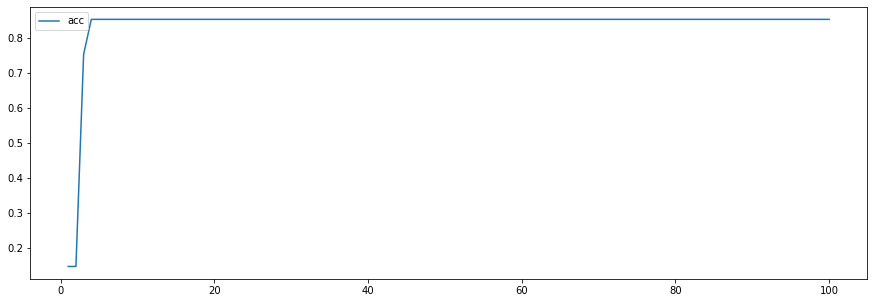

In [11]:
# 학습현황 시각화
# accuracy값을 기준으로 시각화
plt.figure(figsize = (15,5))
plt.plot(range(1,101), h.history['accuracy'], label='acc')
plt.legend()
plt.show()
# 초반의 w, b를 잘 설정

In [18]:
# 4. 모델 평가
result = model_binary.evaluate(X_test,y_test)
# 84% 성능 - 성능 나름 괜찮음
print('loss:',result[0])
print('acc:', result[1])

5/5 [==============================] - 0s 599us/step - loss: 0.4335 - accuracy: 0.8440
loss: 0.4335494935512543
acc: 0.8439716100692749


In [17]:
# 예측
# predict
model_binary.predict(X_test)

array([[0.14858311],
       [0.1563248 ],
       [0.14858457],
       [0.14858556],
       [0.14858311],
       [0.14858326],
       [0.14858776],
       [0.15632486],
       [0.14858505],
       [0.14858225],
       [0.14858168],
       [0.14877567],
       [0.14858457],
       [0.14858255],
       [0.1485787 ],
       [0.1485982 ],
       [0.14858326],
       [0.14858028],
       [0.14858177],
       [0.14858076],
       [0.1485888 ],
       [0.14858648],
       [0.14878294],
       [0.14858276],
       [0.1485835 ],
       [0.14860523],
       [0.14903826],
       [0.14858398],
       [0.14858851],
       [0.14858568],
       [0.14858586],
       [0.14945361],
       [0.14857942],
       [0.14858264],
       [0.15004188],
       [0.14858499],
       [0.14858842],
       [0.14858273],
       [0.14858711],
       [0.14859116],
       [0.148588  ],
       [0.15509799],
       [0.1486103 ],
       [0.14858168],
       [0.14896488],
       [0.14858297],
       [0.14858457],
       [0.148

In [19]:
model_binary.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    